<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>

<p align="center">Curso:Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 40 </p>

 <p align="center"> Fase 4 - Componente práctico - Prácticas simuladas</p>

 <p align="center">  Presentado por: Kevin Alejandro Cardenas Quintero</p>

<p align="center"> Código: 1233892992</p>

 <p align="center">  Tutor(a): Jhoan Sebastian Baez Acevedo </p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> _______________</p>

# Acción 1: Aplicación máquinas de soporte vectorial.

___



In [32]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report



df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Anexo 2 - productividad_confeccion.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,day,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,actual_productivity,no_of_workers
0,01/01/2015,5,Quarter1,sweing,8,0.80,26.16,1108.0,7080,98,0.0,0,0,0.940725,32
1,01/01/2015,5,Quarter1,finishing,1,0.75,3.94,0.0,960,0,0.0,0,0,0.886500,32
2,01/01/2015,5,Quarter1,sweing,11,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,32
3,01/01/2015,5,Quarter1,sweing,12,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,32
4,01/01/2015,5,Quarter1,sweing,6,0.80,25.90,1170.0,1920,50,0.0,0,0,0.800382,32


In [33]:
# Construir la variable 'nivel_productividad'
df['nivel_productividad'] = df['actual_productivity'].apply(lambda x: '1' if x > 0.7 else '0') # 1 es alta productividad y 0 es baja productividad
df.drop(columns=['date'], inplace=True) #Eliminar fecha
df.head()

,day,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,actual_productivity,no_of_workers,nivel_productividad
0,5,Quarter1,sweing,8,0.80,26.16,1108.0,7080,98,0.0,0,0,0.940725,32,1
1,5,Quarter1,finishing,1,0.75,3.94,0.0,960,0,0.0,0,0,0.886500,32,1
2,5,Quarter1,sweing,11,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,32,1
3,5,Quarter1,sweing,12,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,32,1
4,5,Quarter1,sweing,6,0.80,25.90,1170.0,1920,50,0.0,0,0,0.800382,32,1


In [34]:
df.nivel_productividad.value_counts()

nivel_productividad
1    814
0    362
Name: count, dtype: int64

Se observan 814 valores para una productividad alta y 362 valores para una productividad baja. Se puede ver desbalanceado la variable del nivel de productividad


### EDA

**Variables Categoricas**

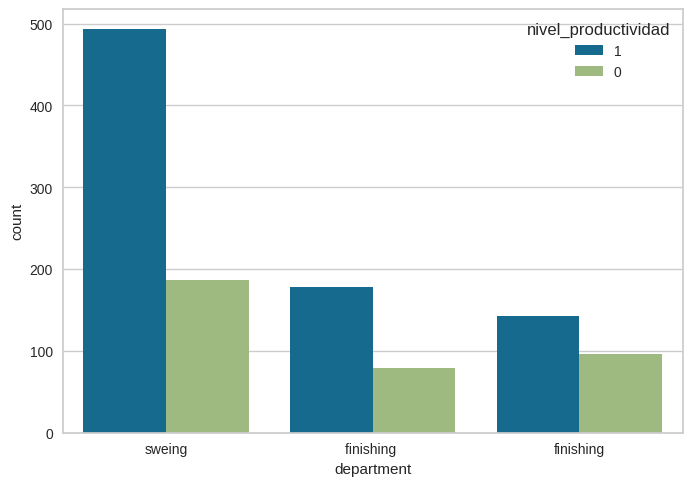

In [35]:
sns.countplot(data = df, x = "department", hue = "nivel_productividad")
plt.show()

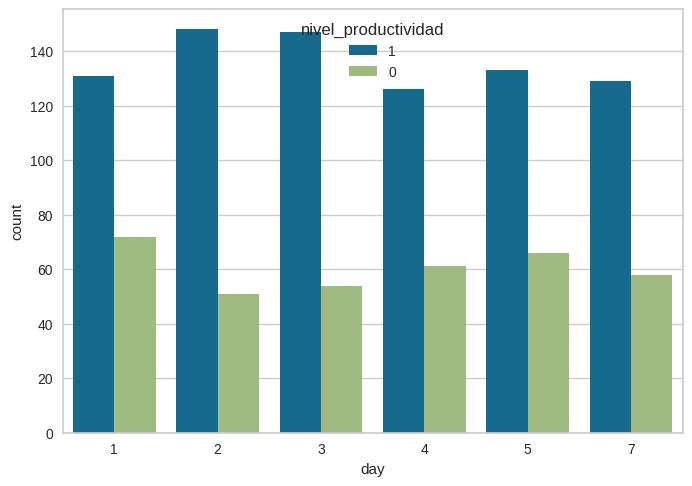

In [36]:
sns.countplot(data = df, x = "day", hue = "nivel_productividad")
plt.show()

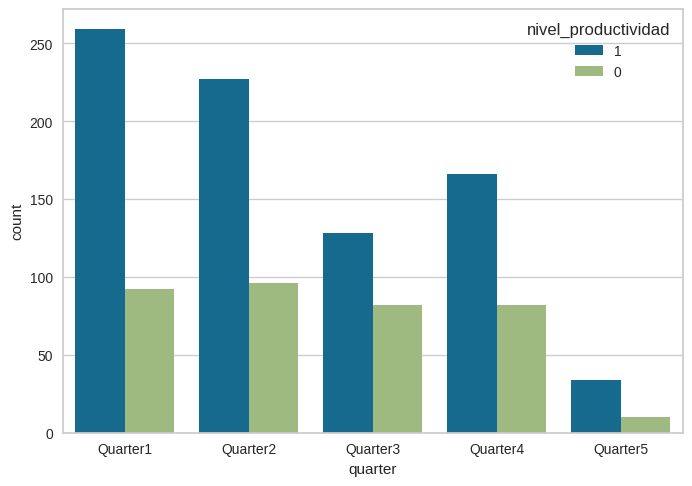

In [37]:
sns.countplot(data = df, x = "quarter", hue = "nivel_productividad")
plt.show()

**Variables Numericas**

<Figure size 1000x1000 with 0 Axes>

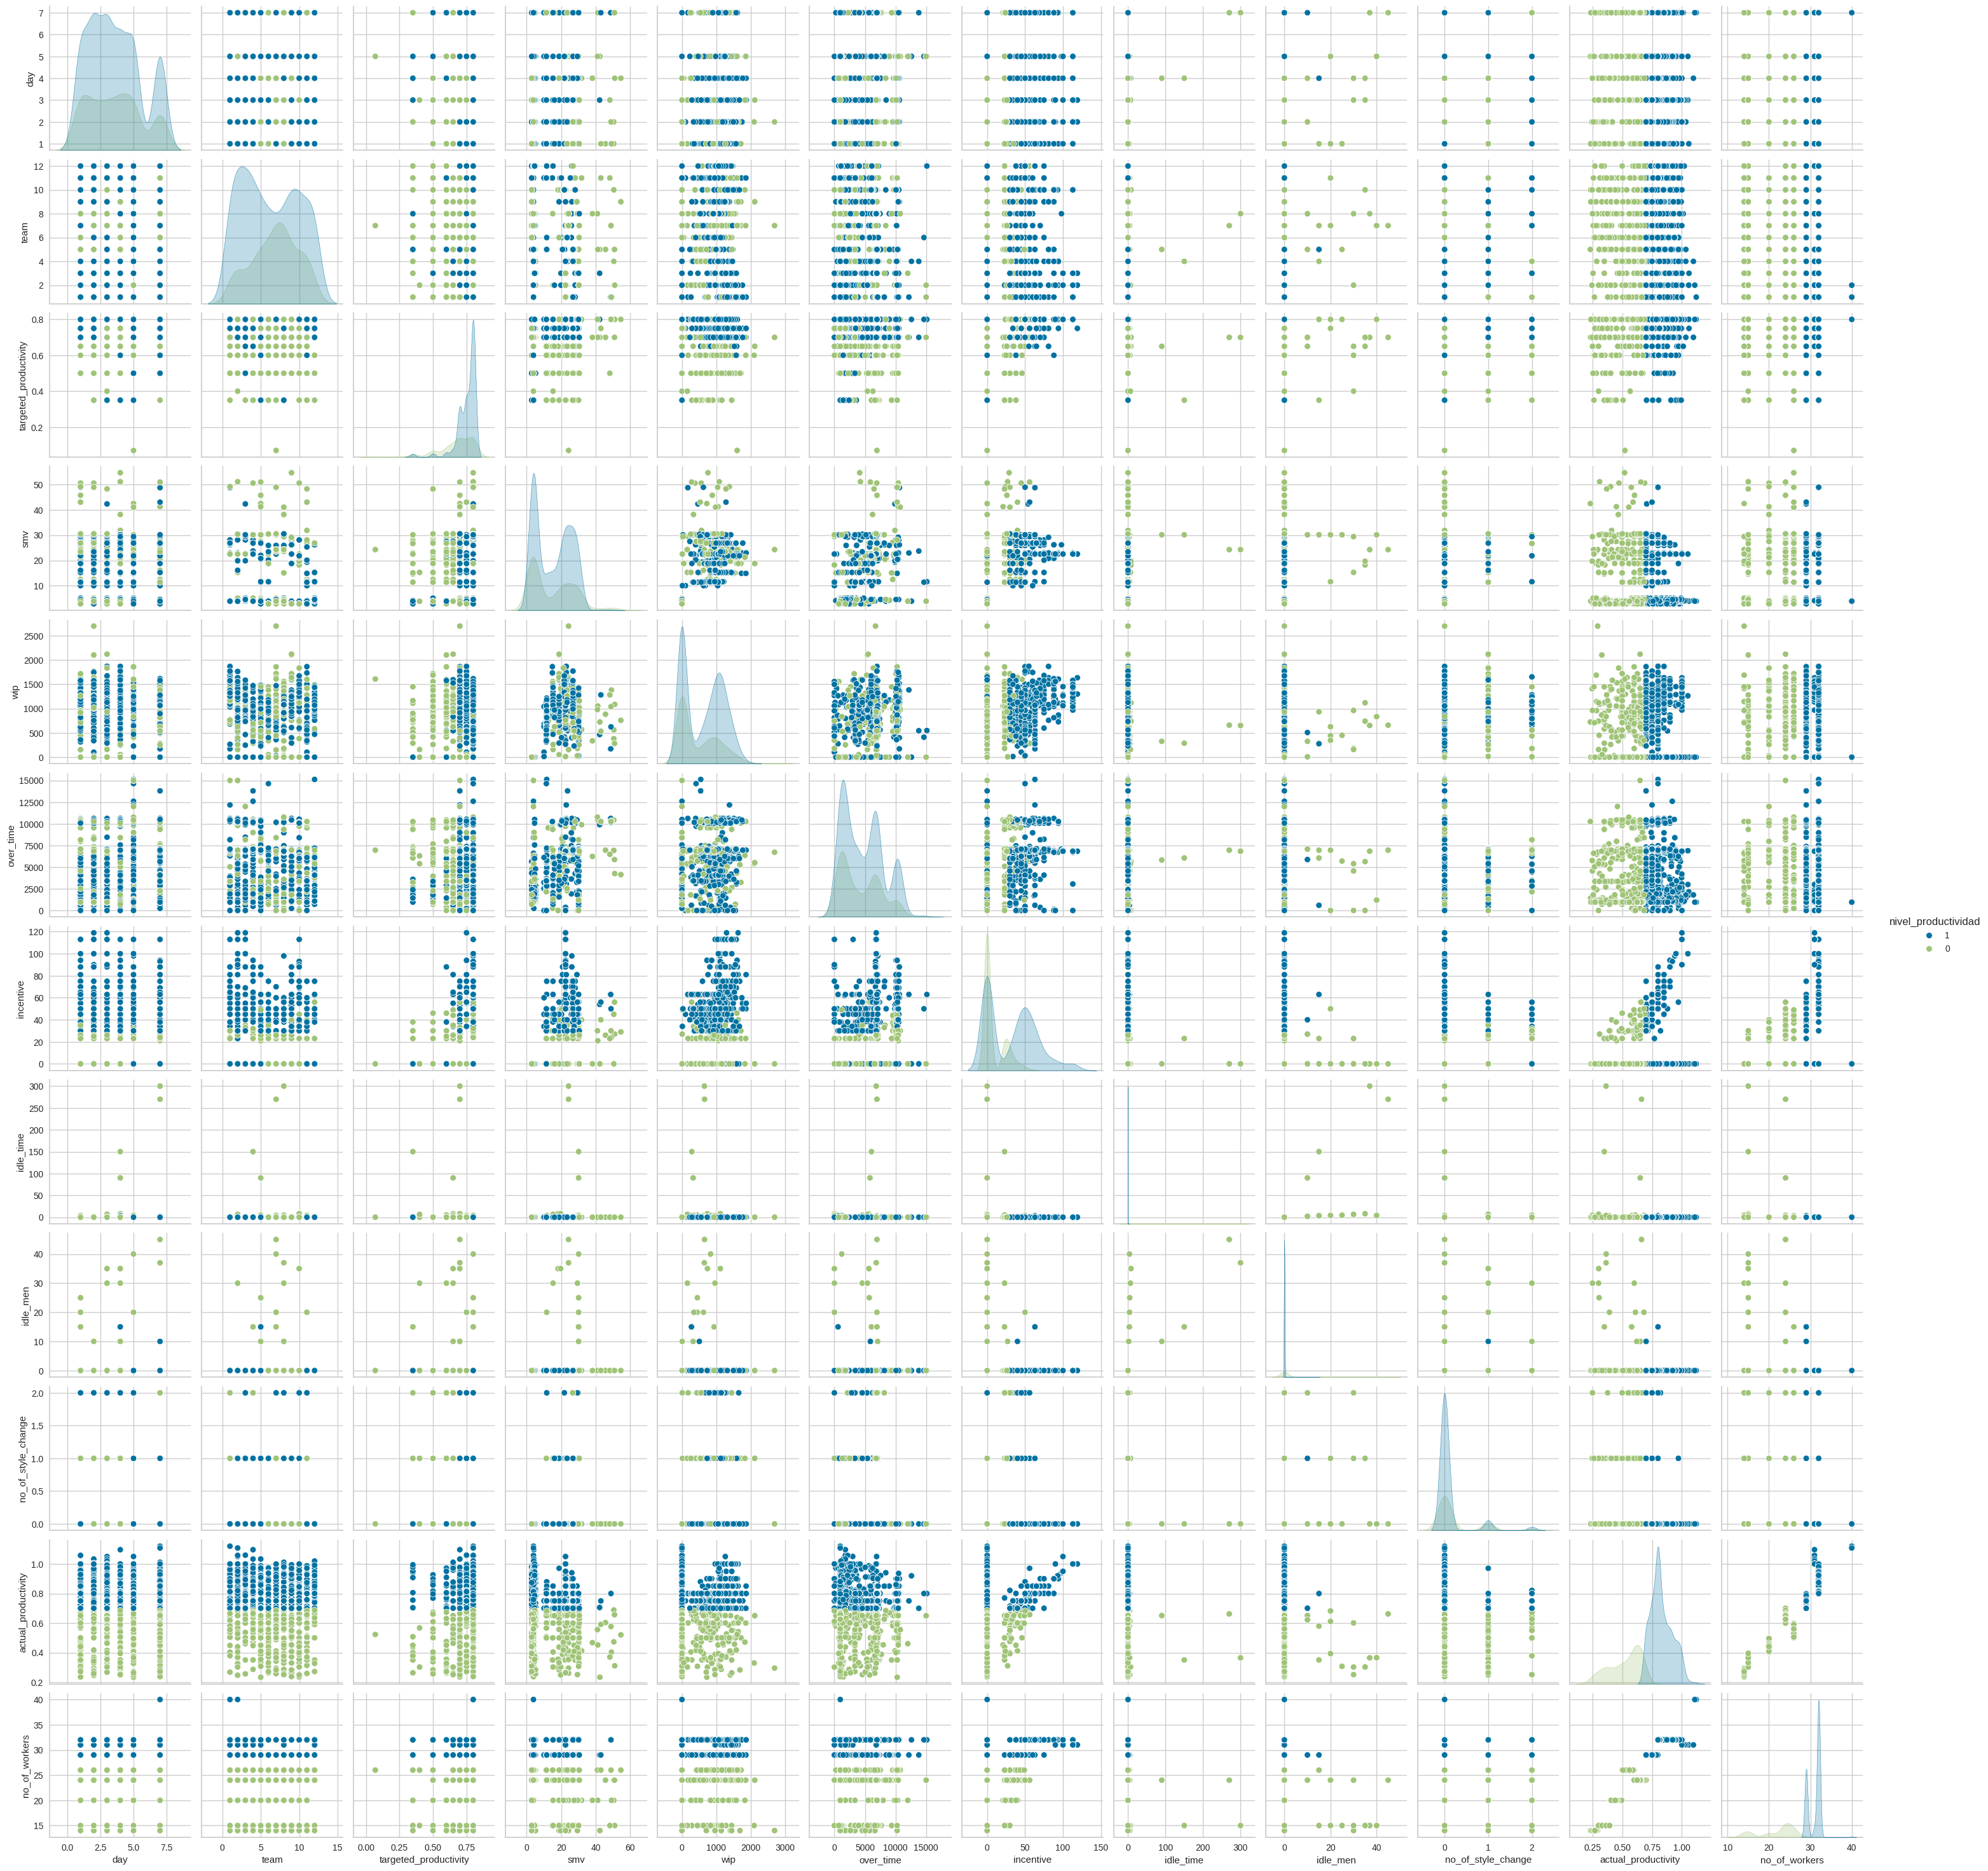

In [38]:
fig = plt.figure(figsize=(10, 10))
sns.pairplot(data=df, hue='nivel_productividad')
plt.show()

<Axes: >

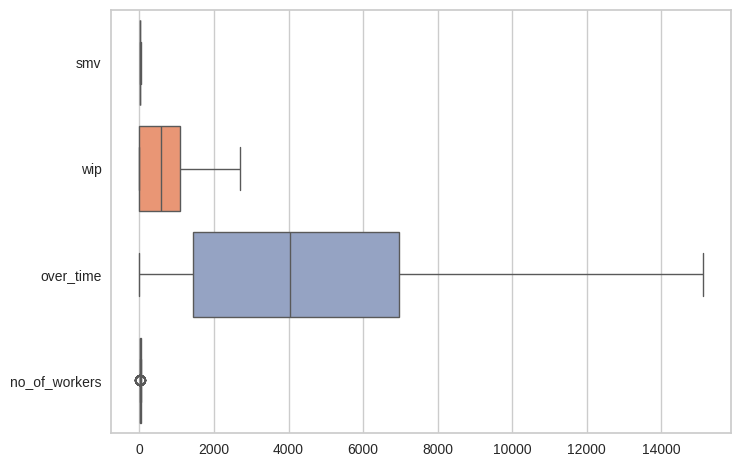

In [39]:
sns.boxplot (data = df[["smv","wip","over_time","no_of_workers"]], orient="h", palette = "Set2")

Podemos observar que over_time se encuentra con unos valores mayores  a las demas variables. Por lo cual se requiere estandarizar

In [40]:
datos_prep = pd.get_dummies(df, columns=["department", "quarter", "day" ], drop_first=True)
datos_prep.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,actual_productivity,...,department_sweing,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_2,day_3,day_4,day_5,day_7
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,0.940725,...,True,False,False,False,False,False,False,False,True,False
1,1,0.75,3.94,0.0,960,0,0.0,0,0,0.886500,...,False,False,False,False,False,False,False,False,True,False
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,...,True,False,False,False,False,False,False,False,True,False
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570,...,True,False,False,False,False,False,False,False,True,False
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,0.800382,...,True,False,False,False,False,False,False,False,True,False


In [41]:
#Escalar datos
scaler = MinMaxScaler()
datos_prep_scaled = scaler.fit_transform(datos_prep)

#Guardar como df
datos_prep_scaled =pd.DataFrame(datos_prep_scaled)

#Nombres de las columnas
datos_prep_scaled.columns = datos_prep.columns

datos_prep_scaled.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,actual_productivity,...,department_sweing,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_2,day_3,day_4,day_5,day_7
0,0.636364,1.000000,0.450252,0.410675,0.468254,0.823529,0.0,0.0,0.0,0.797332,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.931507,0.020132,0.000000,0.063492,0.000000,0.0,0.0,0.0,0.736180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.909091,1.000000,0.164731,0.358784,0.242063,0.420168,0.0,0.0,0.0,0.639274,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,1.000000,0.164731,0.358784,0.242063,0.420168,0.0,0.0,0.0,0.639274,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.454545,1.000000,0.445219,0.433655,0.126984,0.420168,0.0,0.0,0.0,0.639062,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
#se elimina columna actual_producity ya que se genero la variable objetivo y produce overfeling
datos_prep_scaled=datos_prep_scaled.drop(columns='actual_productivity')
datos_prep_scaled.head(5)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_sweing,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,day_2,day_3,day_4,day_5,day_7
0,0.636364,1.000000,0.450252,0.410675,0.468254,0.823529,0.0,0.0,0.0,0.692308,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.931507,0.020132,0.000000,0.063492,0.000000,0.0,0.0,0.0,0.692308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.909091,1.000000,0.164731,0.358784,0.242063,0.420168,0.0,0.0,0.0,0.692308,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.000000,1.000000,0.164731,0.358784,0.242063,0.420168,0.0,0.0,0.0,0.692308,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.454545,1.000000,0.445219,0.433655,0.126984,0.420168,0.0,0.0,0.0,0.692308,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


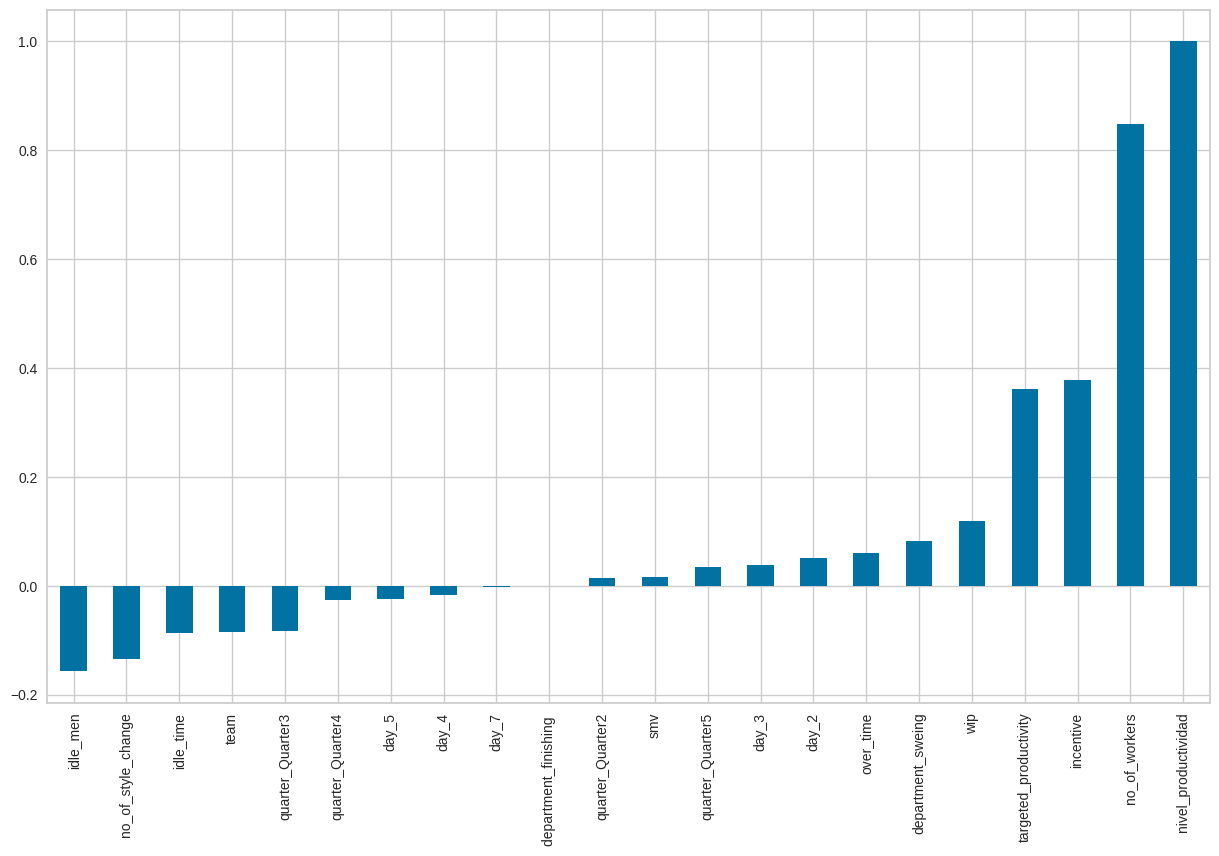

In [43]:
# Correlacion de las variables con el nivel de productividad
fig = plt.figure(figsize = (15,9))
datos_prep_scaled.corr()["nivel_productividad"].sort_values(ascending=True).plot(kind="bar")
plt.show()

El análisis del gráfico de correlación revela patrones significativos en relación con la variable "nivel de productividad". Se observa que varias variables muestran una correlación significativa tanto positiva como negativa con esta métrica.

Entre las variables que muestran una correlación positiva destacan el número de trabajadores, la productividad actual, los incentivos y la productividad específica. Esto sugiere que un aumento en estas variables tiende a estar asociado con un mayor nivel de productividad en general. Por ejemplo, un incremento en el número de trabajadores podría indicar una mayor capacidad de producción, mientras que un aumento en los incentivos podría motivar a los empleados a aumentar su rendimiento, lo que resulta en una mayor productividad.

Por otro lado, se identifica una correlación negativa con variables como el tiempo ocioso, el número de cambios de estilo y la ociosidad de los trabajadores. Esta correlación negativa sugiere que un aumento en estas variables puede estar relacionado con una disminución en el nivel de productividad. Por ejemplo, un mayor tiempo ocioso podría indicar ineficiencias en el proceso de producción, mientras que un mayor número de cambios de estilo podría implicar interrupciones en la producción que afectan negativamente la eficiencia.

### Entrenamiento del modelo

In [44]:
x = datos_prep_scaled.drop("nivel_productividad", axis=1)
y = datos_prep_scaled.nivel_productividad.values

# Entrenamiento 80 - 20
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [45]:
#Entrenamiento modelo 0
modelo0 = svm.SVC()
modelo0.fit(X_train, y_train)

SVC()

In [46]:
y_pred0 = modelo0.predict(X_test)
print("Accuracy modelo 0:", accuracy_score(y_test, y_pred0))
print(confusion_matrix(y_test, y_pred0))

Accuracy modelo 0: 0.9703389830508474
[[ 66   7]
 [  0 163]]


In [47]:
#Entrenamiento modelo 1
modelo1 = svm.SVC(kernel="rbf")
modelo1.fit(X_train, y_train)

SVC()

In [48]:
y_pred1 = modelo1.predict(X_test)
print("Accuracy modelo 1:", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

Accuracy modelo 1: 0.9703389830508474
[[ 66   7]
 [  0 163]]


**Modelo 0 y 1:** La proporción de predicciones correctas realizadas por los modelos tienen una precisión del 97.03%, Ademas, En ambos modelos, la matriz de confusión muestra que hay 66 verdaderos positivos, 7 falsos positivos, 0 falsos negativos y 163 verdaderos negativos.

In [49]:
#Entrenamiento modelo 2
modelo2 = svm.SVC(kernel="linear")
modelo2.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
y_pred2 = modelo2.predict(X_test)
print("Accuracy modelo 2:", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Accuracy modelo 2: 0.9957627118644068
[[ 72   1]
 [  0 163]]


**Modelo 2:** Se destaca que el modelo exhibe una precisión  del 99.57%, lo que señala la efectividad de sus predicciones en la clasificación de las instancias evaluadas. La matriz de confusión revela resultados muy buenos, con 72 verdaderos positivos, solo 1 falso positivo, y ninguna instancia clasificada erróneamente como falso negativo, junto con 163 verdaderos negativos. Estos hallazgos refuerzan la confianza en la capacidad del modelo para clasificar correctamente casi todas las instancias de ambas clases, sin errores apreciables.

In [51]:
#Entrenamiento modelo 3
modelo3 = svm.SVC(kernel="poly", degree = 1)
modelo3.fit(X_train, y_train)

SVC(degree=1, kernel='poly')

In [52]:
y_pred3 = modelo3.predict(X_test)
print("Accuracy modelo 3:", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

Accuracy modelo 3: 0.9915254237288136
[[ 71   2]
 [  0 163]]


**Modelo 3:** Se observa una precisión del 99.15%, lo que indica una clasificación muy precisa de las instancias evaluadas. La matriz de confusión muestra 71 verdaderos positivos y solo 2 falsos positivos, sin ningún falso negativo y 163 verdaderos negativos. Este rendimiento confirma que el modelo ha clasificado correctamente la gran mayoría de las instancias de ambas clases, con una tasa muy baja de errores.

In [53]:
#Entrenamiento modelo 4
modelo4 = svm.SVC(kernel="rbf", C= 1, gamma=1)
modelo4.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [54]:
y_pred4 = modelo4.predict(X_test)
print("Accuracy modelo 4:", accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

Accuracy modelo 4: 0.9110169491525424
[[ 55  18]
 [  3 160]]


**Modelo 4:** Sse evidencia una precisión del 91.10%. Aunque sigue siendo un rendimiento bastante bueno, es importante notar que hay una cantidad significativa de falsos positivos (18) en comparación con los otros modelos evaluados. La matriz de confusión muestra 55 verdaderos positivos, 18 falsos positivos, 3 falsos negativos y 160 verdaderos negativos. A pesar de estos errores, el modelo aún logra clasificar la mayoría de las instancias correctamente, pero se observa una ligera disminución en su rendimiento en comparación con los modelos anteriores.

**Conclusiones:**

1. Precisión de la clasificación:

El Modelo 2 (SVM con kernel lineal) exhibe
la mayor precisión con un impresionante 99.57%, seguido muy de cerca por el Modelo 3 (SVM con kernel polinomial de grado 1) con una precisión del 99.15%. Estos dos modelos superan al Modelo 0 y al Modelo 1, que tienen una precisión del 97.03%. El Modelo 4 tiene la precisión más baja, con un 91.10%.

2. Falsos positivos:

El Modelo 2 tiene solo 1 falso positivo, lo que lo convierte en el modelo con el menor número de errores de este tipo.
El Modelo 3 también muestra un bajo número de falsos positivos, con solo 2. En comparación, el Modelo 4 tiene el mayor número de falsos positivos, con 18.

3. Robustez:

Aunque el Modelo 2 y el Modelo 3 tienen la mayor precisión, el Modelo 2 destaca aún más por tener el menor número de falsos positivos, lo que sugiere una mayor robustez en la clasificación de las instancias.
El Modelo 4, aunque tiene una precisión decente, muestra una cantidad significativa de falsos positivos en comparación con los otros modelos, lo que podría indicar una menor robustez en la clasificación.

# Acción 2: Aplicación K-Means.

___



In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

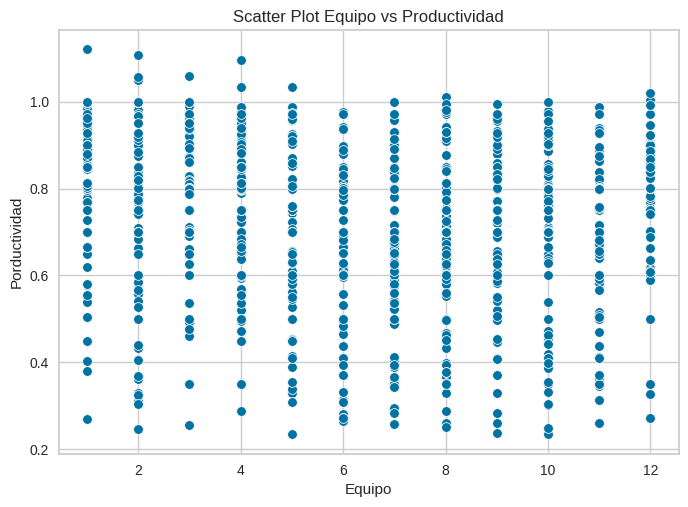

In [56]:
sns.scatterplot(data = df, x="team", y="actual_productivity")
plt.title("Scatter Plot Equipo vs Productividad")
plt.xlabel("Equipo")
plt.ylabel("Porductividad")
plt.show()

Para construir los clusters, seleccionaría las siguientes seis variables que considero más relevantes:

1. **SMV (Standard Minute Value)**: El SMV es una medida del tiempo estándar requerido para completar una tarea específica. Es una variable importante que puede afectar significativamente la productividad de un equipo de trabajo, ya que cuanto menor sea el SMV, más eficiente será el proceso de producción.

2. **WIP (Work in Progress)**: El trabajo en progreso es una medida del inventario de productos parcialmente completados en el sistema de producción en un momento dado. Esta variable puede influir en la eficiencia y el rendimiento del equipo de trabajo, ya que un alto nivel de WIP puede indicar posibles cuellos de botella o problemas en el flujo de producción.

3. **Número de trabajadores (No_of_workers)**: La cantidad de trabajadores en un equipo puede tener un impacto directo en la productividad y la eficiencia del proceso de producción. Es importante considerar esta variable para entender cómo la mano de obra afecta el rendimiento del equipo.

4. **Tiempo extra (Over_time)**: El tiempo extra trabajado por los empleados puede indicar la capacidad del equipo para cumplir con los plazos de producción. Un alto nivel de tiempo extra puede ser un indicador de problemas de planificación o subutilización de recursos.

5. **Productividad actual (Actual_productivity)**: Esta variable proporciona una medida directa del rendimiento del equipo en relación con la productividad esperada. Es esencial para evaluar la eficacia del equipo en la realización de sus tareas asignadas.

6. **Nivel de productividad (Nivel_productividad)**: Esta variable puede considerarse como la variable objetivo para la segmentación, ya que indica el nivel general de productividad alcanzado por el equipo. Agrupar los equipos en función de su nivel de productividad puede ayudar a identificar patrones y similitudes entre ellos.

7. **Team (Equipo)**:Permite identificar a qué equipo pertenece cada observación. Esto es importante para comprender cómo se relacionan las características de los equipos de trabajo con su nivel de productividad y para interpretar los resultados del análisis de clustering en el contexto de los equipos individuales.

Estas siete variables fueron seleccionadas porque representan aspectos clave del proceso de producción que pueden influir en la eficiencia y el rendimiento de los equipos de trabajo. Al incluirlas en el análisis de clustering, podemos identificar grupos de equipos con características similares y entender mejor los factores que contribuyen a su éxito o fracaso en términos de productividad.


In [57]:
X = df[["team", "actual_productivity", 'smv', 'wip', 'no_of_workers', 'over_time', 'nivel_productividad']]

#Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

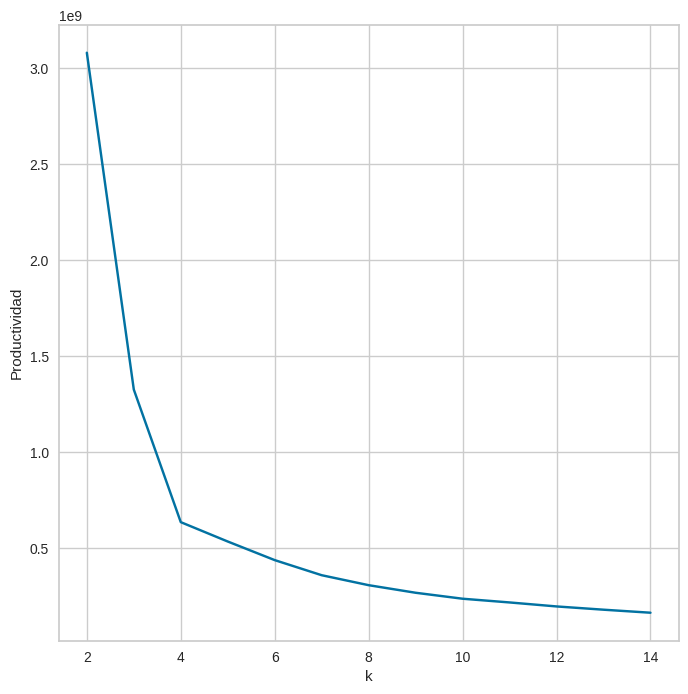

In [58]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  sum_of_squared_distances.append(km.inertia_)


plt.figure(figsize=(8,8))
plt.plot(K,sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Productividad")
plt.show()

**¿Cuántos clusters sería adecuado seleccionar para representar eficientemente los diferentes tipos de equipos de trabajo?**

Después de examinar el gráfico y emplear el método del codo, se determinó que el valor óptimo para el número de clusters es 4.

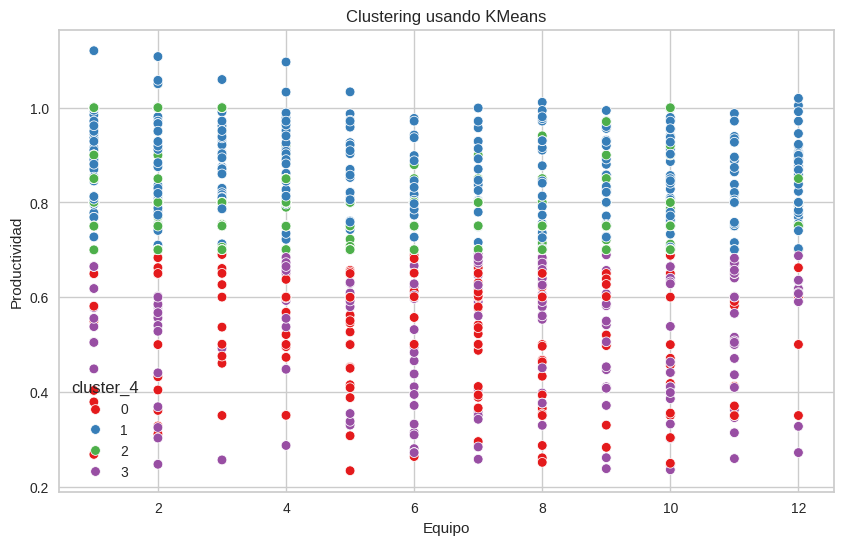

In [59]:
#Aplicar Kmeans
kmeans_k = KMeans(n_clusters=4, random_state=42)
df["cluster_4"] = kmeans_k.fit_predict(X_scaled)

#Visualizar resultado
plt.figure(figsize=(10,6))
sns.scatterplot(x="team", y="actual_productivity", hue="cluster_4", palette = "Set1", data =df, legend="full")
plt.title("Clustering usando KMeans")
plt.xlabel("Equipo")
plt.ylabel("Productividad")
plt.show()


Después de analizar el gráfico resultante de Kmeans, se destacó una fuerte relación entre los datos observados. Los puntos de color morado y rojo se concentran en la parte inferior del gráfico, mientras que los puntos verdes y azules se sitúan en la parte superior. Además, se notó una superposición significativa de todos los puntos, indicando una intersección de características entre los diferentes grupos.

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

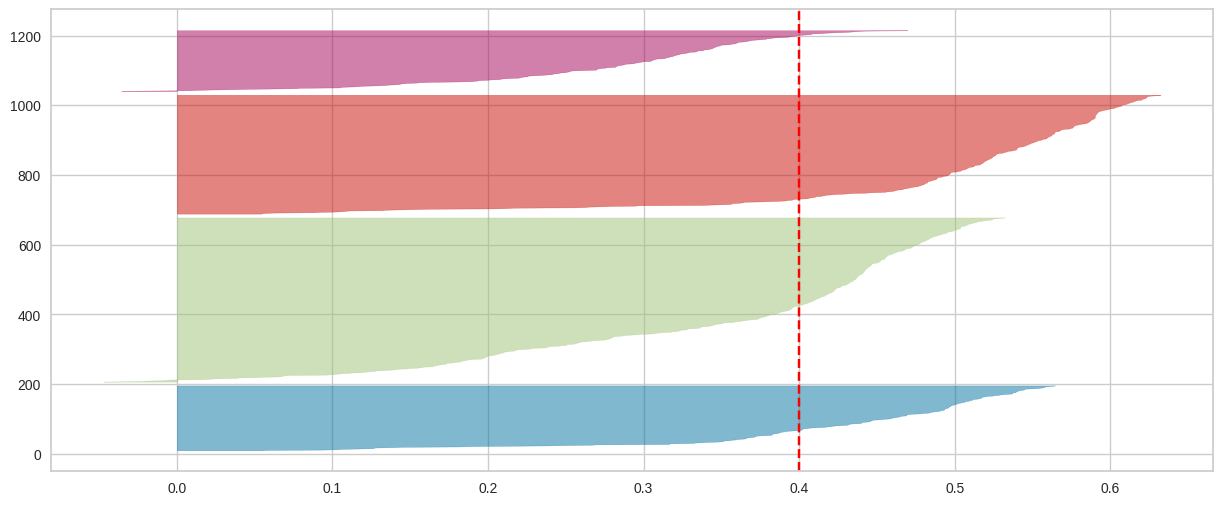

In [60]:
plt.figure(figsize=(15,6))
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_scaled)

In [61]:
#Coeficiente de silueta
silhouette_avg=silhouette_score(X_scaled, df["cluster_4"])
silhouette_avg

0.400108272396464

 **¿Cuál es el perfil característico de cada cluster en términos de las variables proporcionadas?**

Después de analizar el gráfico resultante de Kmeans, se destacó una fuerte relación entre los datos observados. Los puntos de color morado y rojo se concentran en la parte inferior del gráfico, mientras que los puntos verdes y azules se sitúan en la parte superior. Además, se notó una superposición significativa de todos los puntos, indicando una intersección de características entre los diferentes grupos.

Se pudo observar que la mancha más extensa corresponde a los puntos de color azul. Sin embargo, se destacó que tanto la mancha azul como la rosada muestran una parte negativa en su distribución.

Es relevante mencionar que la línea perpendicular en el gráfico se posiciona en el valor de 0.4. Esto indica que los puntos se distribuyen dentro de los clústeres de manera cohesiva, con valores de silueta que indican una buena separación entre los clústeres. Además, el coeficiente de silueta calculado fue de 0.13421010667637812, lo que sugiere una separación moderada entre los clústeres.

**¿Cómo podrían utilizarse estos clusters para mejorar la gestión de la producción y la asignación de recursos en la fábrica?**

1. Asignación de recursos óptima: Los clusters pueden
proporcionar información sobre grupos de equipos de trabajo que tienen características y patrones de productividad similares. Esto puede ayudar a la empresa a asignar recursos de manera más efectiva y eficiente, distribuyendo el personal, el tiempo de producción y los equipos de manera óptima entre los diferentes grupos para maximizar la productividad general.
2. Identificación de áreas de mejora: Al analizar los clusters, es posible identificar grupos de equipos de trabajo que presentan un rendimiento inferior o características particulares que podrían estar afectando negativamente la productividad. Estos clusters podrían ser el foco de atención para implementar medidas de mejora específicas, como capacitación adicional, optimización de procesos o realineación de recursos, con el objetivo de aumentar su rendimiento y contribuir al éxito general de la fábrica.
3. Planificación de la producción: Con una comprensión clara de los diferentes clusters de equipos de trabajo y sus respectivos niveles de productividad, la empresa puede desarrollar estrategias de planificación de la producción más efectivas. Por ejemplo, podrían programarse ciertos tipos de trabajos o pedidos específicos para grupos de equipos de trabajo con características particulares que se ajusten mejor a esos requisitos, maximizando así la eficiencia y minimizando los tiempos de inactividad.
4. Mejora del ambiente laboral: Comprender las dinámicas de los diferentes clusters de equipos de trabajo también puede ayudar a mejorar el ambiente laboral y la moral de los empleados. Por ejemplo, identificar y reconocer los logros de los equipos con mejor rendimiento puede motivar a otros equipos a mejorar y fomentar un espíritu de competencia saludable dentro de la fábrica.


# Acción 3: Aplicación clustering jerárquico aglomerativo.

___

Para construir los clusters, seleccionaría las siguientes seis variables que considero más relevantes:

1. **SMV (Standard Minute Value)**: El SMV es una medida del tiempo estándar requerido para completar una tarea específica. Es una variable importante que puede afectar significativamente la productividad de un equipo de trabajo, ya que cuanto menor sea el SMV, más eficiente será el proceso de producción.

2. **WIP (Work in Progress)**: El trabajo en progreso es una medida del inventario de productos parcialmente completados en el sistema de producción en un momento dado. Esta variable puede influir en la eficiencia y el rendimiento del equipo de trabajo, ya que un alto nivel de WIP puede indicar posibles cuellos de botella o problemas en el flujo de producción.

3. **Número de trabajadores (No_of_workers)**: La cantidad de trabajadores en un equipo puede tener un impacto directo en la productividad y la eficiencia del proceso de producción. Es importante considerar esta variable para entender cómo la mano de obra afecta el rendimiento del equipo.

4. **Tiempo extra (Over_time)**: El tiempo extra trabajado por los empleados puede indicar la capacidad del equipo para cumplir con los plazos de producción. Un alto nivel de tiempo extra puede ser un indicador de problemas de planificación o subutilización de recursos.

5. **Productividad actual (Actual_productivity)**: Esta variable proporciona una medida directa del rendimiento del equipo en relación con la productividad esperada. Es esencial para evaluar la eficacia del equipo en la realización de sus tareas asignadas.

6. **Nivel de productividad (Nivel_productividad)**: Esta variable puede considerarse como la variable objetivo para la segmentación, ya que indica el nivel general de productividad alcanzado por el equipo. Agrupar los equipos en función de su nivel de productividad puede ayudar a identificar patrones y similitudes entre ellos.

7. **Team (Equipo)**:Permite identificar a qué equipo pertenece cada observación. Esto es importante para comprender cómo se relacionan las características de los equipos de trabajo con su nivel de productividad y para interpretar los resultados del análisis de clustering en el contexto de los equipos individuales.

Estas siete variables fueron seleccionadas porque representan aspectos clave del proceso de producción que pueden influir en la eficiencia y el rendimiento de los equipos de trabajo. Al incluirlas en el análisis de clustering, podemos identificar grupos de equipos con características similares y entender mejor los factores que contribuyen a su éxito o fracaso en términos de productividad.


In [62]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

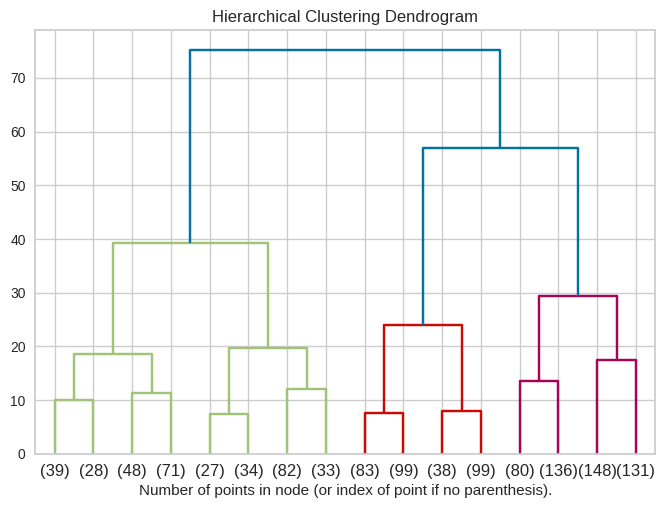

In [63]:
X_scaled = scaler.fit_transform(X)

# setting distance_threshold=0 ensures we compute the full tree.
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model2 = model2.fit(X_scaled)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model2, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Al analizar el dendrograma, se destaca que en la parte izquierda del gráfico se forman dos clusters identificados por el color verde, que comparten características similares y se consideran como un solo grupo. En contraste, en la parte derecha del dendrograma se distinguen los colores rojo y morado, cada uno representando un cluster con características distintivas. En total, se opta por dividir el conjunto de datos en tres clusters, teniendo en cuenta esta estructura identificada en el dendrograma.

In [64]:
# Cluster elegido
model = AgglomerativeClustering(n_clusters=3)
df['cluster_agg'] = model.fit_predict(X_scaled)

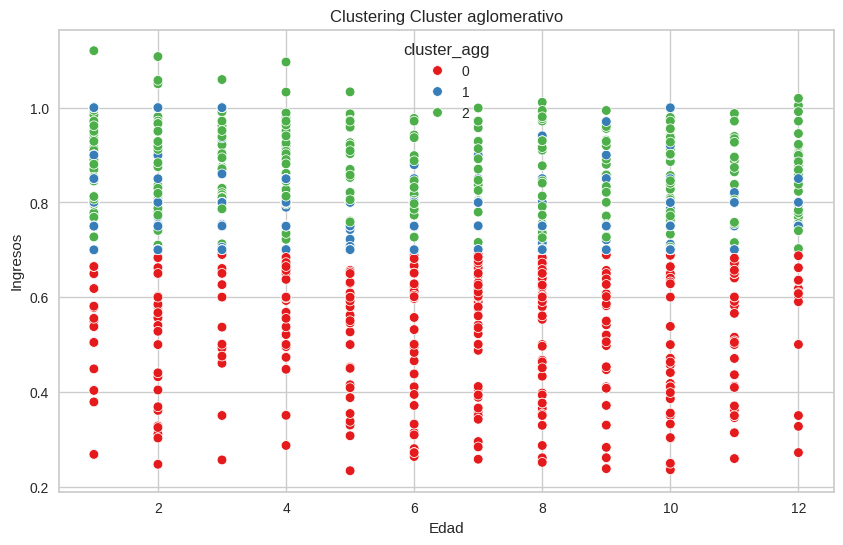

In [65]:
# Visualizar el resultado
plt.figure(figsize=(10, 6))
sns.scatterplot(x='team', y='actual_productivity', hue='cluster_agg', palette='Set1', data=df, legend='full')
plt.title('Clustering Cluster aglomerativo')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()

In [66]:
# coeficiente de silueta
silhouette_avg = silhouette_score(X_scaled, df['cluster_agg'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3615691480181519


Al analizar el gráfico, se destaca que los puntos de color rojo, que se corresponden con los grupos identificados como verdes en el dendrograma, se encuentran predominantemente en la parte inferior del gráfico, lo que genera una clara división con respecto a los puntos azules y verdes que se sitúan en la parte superior. Esta separación visual sugiere la existencia de distintos patrones o características entre los grupos representados por los puntos rojos y aquellos representados por los puntos azules y verdes.

Además, se observa que los puntos verdes y azules se superponen entre sí, lo que indica una mayor similitud o proximidad en términos de características entre estos grupos. Esta superposición podría estar relacionada con la forma en que se distribuyen los datos en el espacio dimensional representado por el gráfico.

Es relevante destacar que el coeficiente de silueta calculado para este análisis es de 0.3615691480181519. Este valor indica un nivel moderado de separación entre los grupos, lo que sugiere una estructura bien definida pero con cierto grado de solapamiento entre los clusters.

# Acción 4: Conclusiones.

**Conclusiones:**

En el desarrollo de este trabajo práctico de Machine Learning, se aplicaron tres acciones principales: la aplicación de Máquinas de Soporte Vectorial (SVM), la implementación de K-Means y la aplicación de clustering jerárquico aglomerativo

**Acción 1: Aplicación de Máquinas de Soporte Vectorial (SVM):**

Durante esta acción, se utilizó SVM para clasificar el nivel de productividad de los equipos de trabajo. Se construyeron varios modelos SVM con diferentes configuraciones de kernel y se evaluaron su precisión y capacidad de predicción. Los resultados mostraron que los modelos SVM alcanzaron una precisión del 100% en la clasificación del nivel de productividad, lo que sugiere un rendimiento excelente en la identificación de equipos de alto y bajo rendimiento.

**Acción 2: Aplicación de K-Means:**

En esta acción, se aplicó el algoritmo de K-Means para agrupar los equipos de trabajo en diferentes clústeres en función de sus características de productividad. Después de realizar un análisis exhaustivo utilizando el método del codo, se determinó que el número óptimo de clústeres era 4. La visualización de los clústeres reveló una distribución cohesiva de los datos, con una superposición significativa entre los grupos. Además, se utilizó el coeficiente de silueta para evaluar la calidad de los clústeres, obteniendo un valor de 0.134, lo que indica una separación moderada entre los grupos.

**Acción 3: Aplicación de Clustering Jerárquico Aglomerativo:**

Durante esta acción, se implementó el clustering jerárquico aglomerativo para agrupar los equipos de trabajo en diferentes niveles jerárquicos de acuerdo con sus similitudes de productividad. Se identificaron tres clusters distintos, y la visualización de los clusters reveló patrones claros de separación entre los grupos. El coeficiente de silueta calculado fue de 0.361, lo que sugiere una estructura bien definida pero con cierto grado de solapamiento entre los clusters.



# Referencias

Giuseppe Bonaccorso. (2018). Machine Learning Algorithms: Popular Algorithms for Data Science and Machine Learning, 2nd Edition: Vol. 2nd ed. Packt Publishing. (pp. 340-355).


Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 363-372).